# 1. Import neccesary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Simulation Rules 

In [2]:
# Set a random seed for reproducibility
np.random.seed(123)

# Intialize lists to store results
all_walks = []

# Simulate the scenario 5000 times
for scene in range(5000):

    # Initialize the random walk
    random_walk = [0]

    for times in range(100):
        step = random_walk[-1]
        dice = np.random.randint(1, 7)
        
        # Movement rules based on dice roll:
        # 1-2: Move down 1 step (but not below 0)
        # 3-5: Move up 1 step
        # 6: Move up 1-6 steps randomly
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1, 7)
        
        # Add the step to the walk
        random_walk.append(step)

        # 0.1% chance of falling back to position 0 (clumsiness factor)
        if np.random.rand() <= 0.001:
            random_walk[-1] = 0
            
    all_walks.append(random_walk)

# Convert the list of walks into a DataFrame
aw = pd.DataFrame(all_walks)
print("The last few rows of the random walks DataFrame:")
aw.tail()

The last few rows of the random walks DataFrame:


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
4995,0,1,2,1,2,3,4,5,6,7,...,48,49,53,52,54,55,60,61,64,65
4996,0,0,1,0,0,3,4,5,6,11,...,81,82,83,84,85,86,91,94,95,101
4997,0,5,4,6,5,6,7,8,9,10,...,49,50,51,52,53,54,55,54,55,54
4998,0,0,1,2,3,4,5,6,5,6,...,41,42,41,40,39,40,41,45,46,45
4999,0,1,0,0,1,2,1,2,3,4,...,48,47,48,47,48,49,52,51,50,51


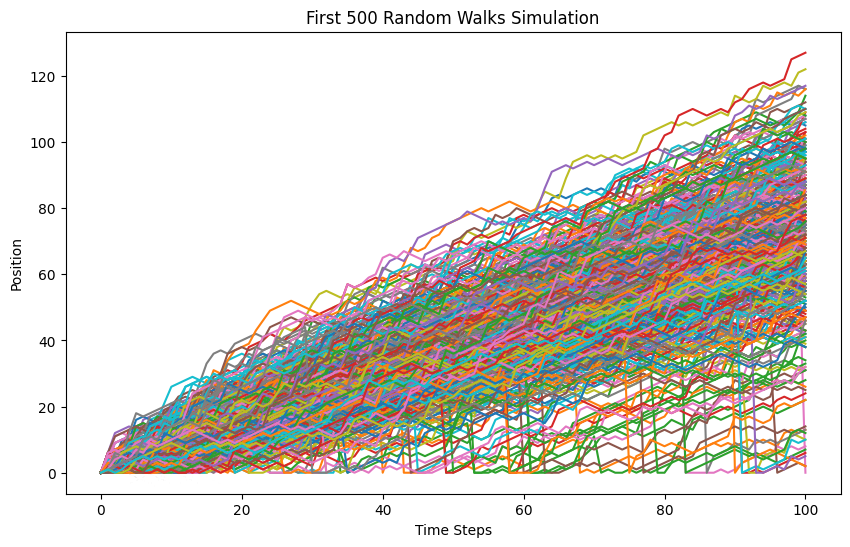

In [9]:
# Create a new figure for the walks plot
plt.figure(figsize=(10, 6))

# Transpose the DataFrame and select the first 50 walks for plotting
# Plot all the walks
plt.plot(aw.iloc[0:500].T)
plt.xlabel('Time Steps')
plt.ylabel('Position')
plt.title('First 500 Random Walks Simulation')
plt.show()

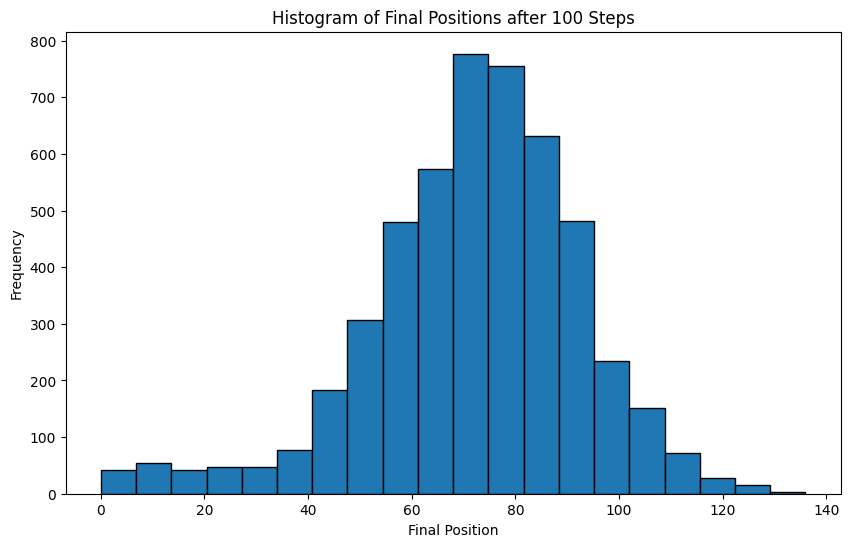

In [4]:
# Get the last row which contains the final positions of all walks
ends = (aw[100])

# Create a new figure for the histogram
plt.figure(figsize=(10, 6))

# Plot a histogram of the final positions
plt.hist(ends, bins=20, edgecolor='black')
plt.xlabel('Final Position')
plt.ylabel('Frequency')
plt.title('Histogram of Final Positions after 100 Steps')
plt.show()

# 3. Calculate the probability of reaching 60th step or higher after 100 moves  

In [5]:
ends = aw[100]
cnt = (ends >= 60).sum()

probability = cnt / len(ends)

print("Total walks: ", len(ends))
print("Times reaching 60th step or higher: ", cnt)
print("Probability: ",probability)

Total walks:  5000
Times reaching 60th step or higher:  3878
Probability:  0.7756
